# Author: Sachin Vinay
## task 4 :Exploratory Data Analysis - Terrorism (Level - Intermediate)
### Data Science and Business Analytics

<b> Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’<b>
    
* As a security/defense analyst, try to find out the hot zone of terrorism.
* What all security issues and insights you can derive by EDA?

In [1]:
#Importing library files

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
#importing dataset using pd.read_csv

In [4]:
#due to an error of UTF-8 ,
#using encoding =('ISO-8859-1'),low_memory =False
#or using encoding=('ISO-8859-2')

In [5]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding=('ISO-8859-1'),low_memory =False)

In [6]:
# for displaying all columns in data set

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
data.shape

(181691, 135)

In [9]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [10]:
# we can either remove all the columns containing NaN values 
#by using dropna() or taking columns which are necessary for furture investigation

In [11]:
#while using dropna() it cause removal of important variables

In [12]:
#therefore Renaming necessary columns and using these columns for further investigation

In [13]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [14]:
#taking important data from whole dataset for further processing.

In [15]:
terror=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [16]:
#info of new terror dataset

In [17]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

## Data Visualisation

In [18]:
#plotting Number Of Terrorist Activities Each Year using Count plot , taking x = 'coulmn for counting'
#palette for color and edge color for edge lining of each bar

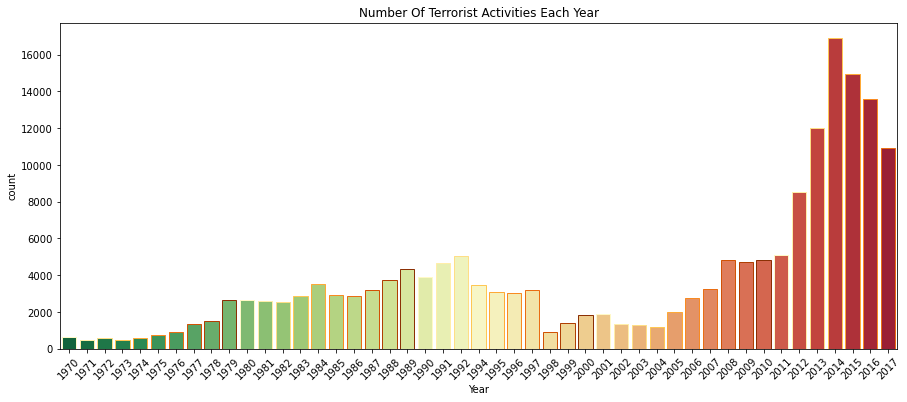

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [20]:
#top 20 countries having most number of attacks

In [21]:
a =terror.Country.value_counts()[:20]

In [22]:
a

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [23]:
#plotting top 20 contries affected by terror attacks
#using crosstab 

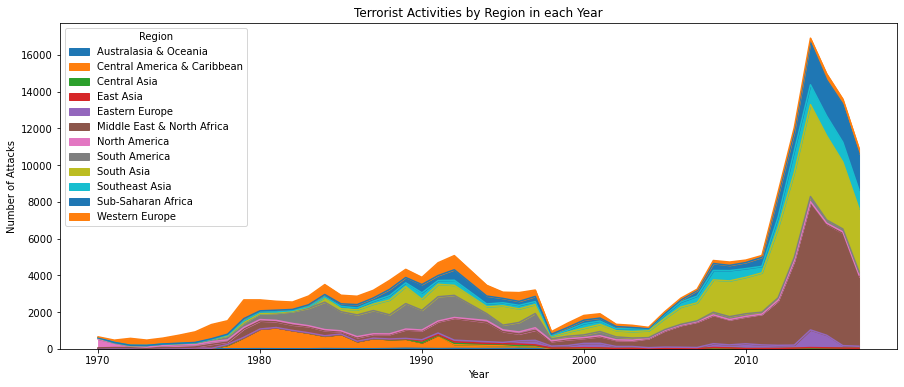

In [24]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

<b>Top 40 Worst Terror Attacks in History from 1982 to 2016<b>

In [25]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

<ipython-input-25-e6e456bbca2a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-e6e456bbca2a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-e6e456bbca2a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [26]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [27]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [28]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout( title='Top 40 Worst Terror Attacks in History from 1982 to 2016', xaxis = dict(ticks='', nticks=20),yaxis = dict(ticks=''))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

<b>top Countries affected by Terrorism<b>

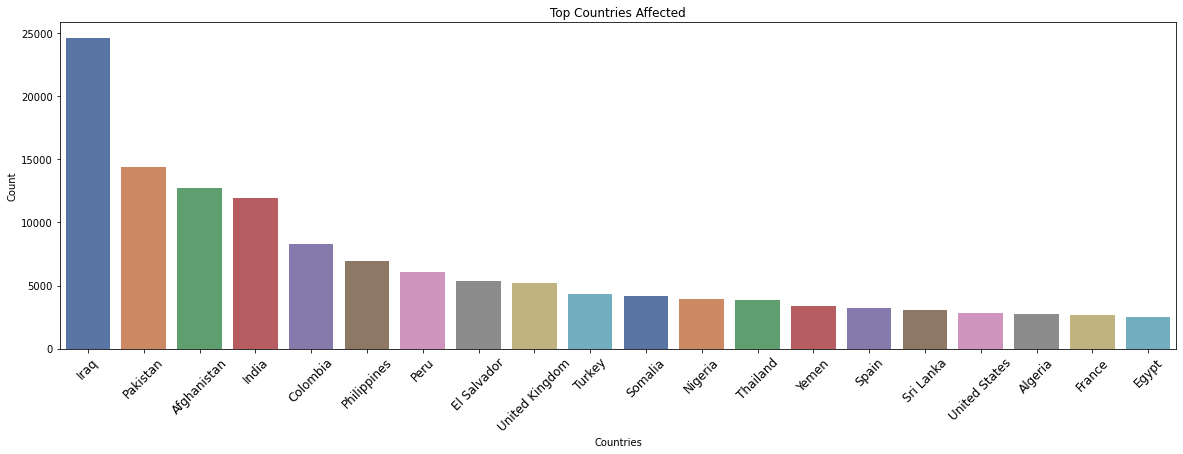

In [29]:
plt.subplots(figsize=(20,6))
sns.barplot(x=a.index,y=a.values,palette="deep")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.xticks(rotation=45,fontsize=12)
plt.ylabel('Count')
plt.show()

## ANALYSIS ON CUSTOMIZED DATA

#### Terrorist Attacks of a Particular year and their Locations

Let's look at the terrorist acts in the world over a certain year.

##### here we use folium for visualisation for more information check out this url
url="https://python-visualization.github.io/folium/index.html"

In [30]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 1970

 # filter data
filterData = terror[filterYear]
# filterData.info()
#We are getting the required fields
reqFilterData = filterData.loc[:,'city':'longitude'] 
# drop NaN values in latitude and longitude
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [31]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [32]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [33]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [34]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

### 84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

let us check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [35]:
terror.Group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [36]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [37]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [38]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [39]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

In [40]:
# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
# drop the NaN values
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


### Killed By Group 

In [42]:
gk=terror.Group.value_counts()[1:20]

In [43]:
gk.values

array([7478, 5613, 4555, 3351, 3288, 2772, 2671, 2487, 2418, 2310, 2024,
       1878, 1630, 1606, 1561, 1351, 1125, 1062, 1020], dtype=int64)

In [44]:
gk

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [45]:
x = gk.index.unique()

In [46]:
y=gk.values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Taliban'),
  Text(0, 1, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(0, 2, 'Shining Path (SL)'),
  Text(0, 3, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(0, 4, 'Al-Shabaab'),
  Text(0, 5, "New People's Army (NPA)"),
  Text(0, 6, 'Irish Republican Army (IRA)'),
  Text(0, 7, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(0, 8, 'Boko Haram'),
  Text(0, 9, "Kurdistan Workers' Party (PKK)"),
  Text(0, 10, 'Basque Fatherland and Freedom (ETA)'),
  Text(0, 11, 'Communist Party of India - Maoist (CPI-Maoist)'),
  Text(0, 12, 'Maoists'),
  Text(0, 13, 'Liberation Tigers of Tamil Eelam (LTTE)'),
  Text(0, 14, 'National Liberation Army of Colombia (ELN)'),
  Text(0, 15, 'Tehrik-i-Taliban Pakistan (TTP)'),
  Text(0, 16, 'Palestinians'),
  Text(0, 17, 'Houthi extremists (Ansar Allah)'),
  Text(0, 18, 'Al-Qaida in the Arabian Peninsula (AQAP)')])

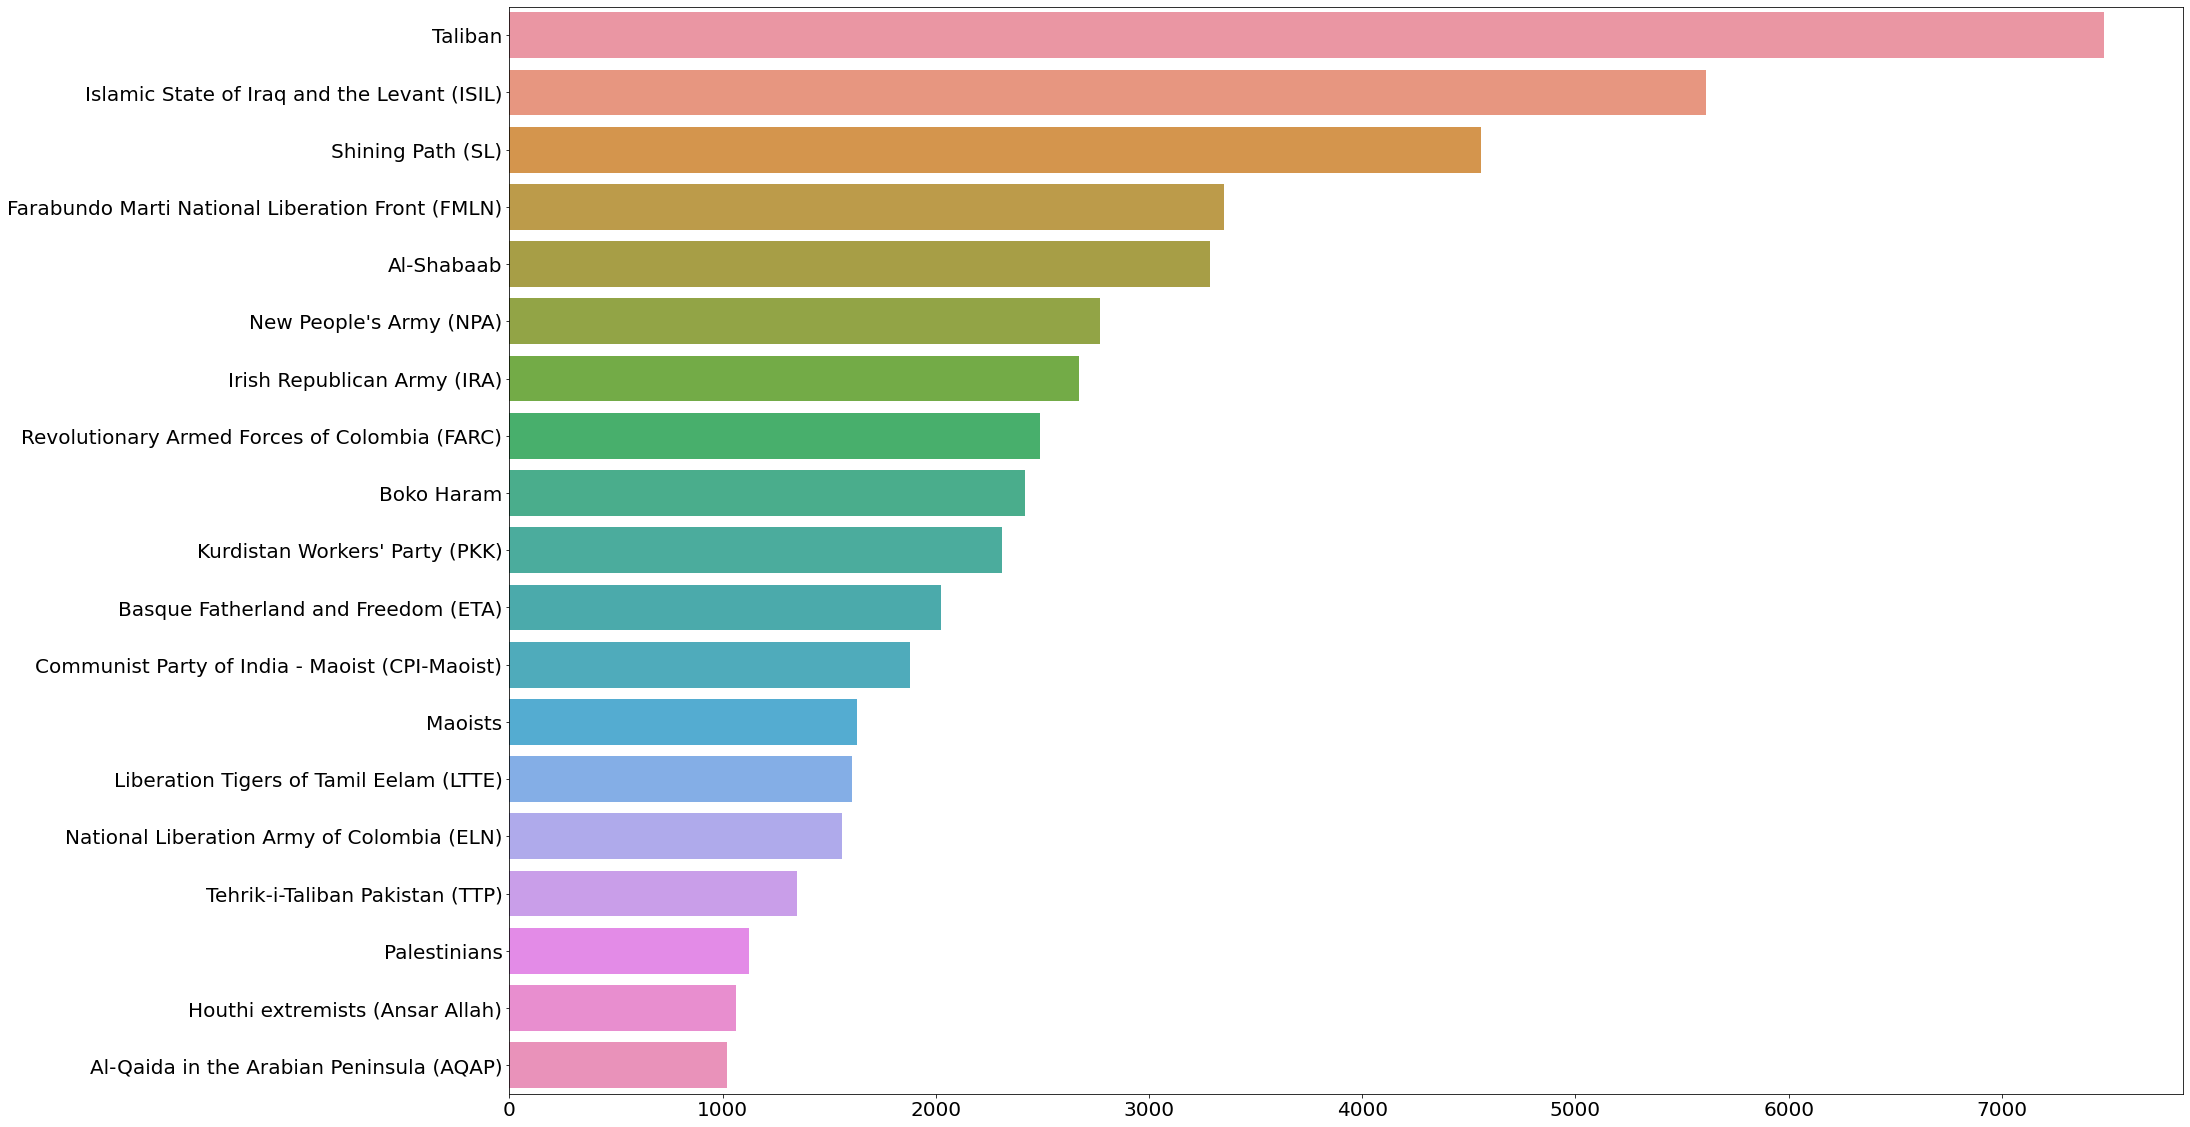

In [47]:
plt.subplots(figsize=(30,20))
ax = sns.barplot(x=y,y=x, orient="h")
plt.xticks(rotation=0,fontsize= 20)
plt.yticks(rotation=0,fontsize= 20)

In [48]:
country=terror.Country.value_counts()[1:20]

In [49]:
x=country.index.unique()

In [50]:
y=country.values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Pakistan'),
  Text(1, 0, 'Afghanistan'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Colombia'),
  Text(4, 0, 'Philippines'),
  Text(5, 0, 'Peru'),
  Text(6, 0, 'El Salvador'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Somalia'),
  Text(10, 0, 'Nigeria'),
  Text(11, 0, 'Thailand'),
  Text(12, 0, 'Yemen'),
  Text(13, 0, 'Spain'),
  Text(14, 0, 'Sri Lanka'),
  Text(15, 0, 'United States'),
  Text(16, 0, 'Algeria'),
  Text(17, 0, 'France'),
  Text(18, 0, 'Egypt')])

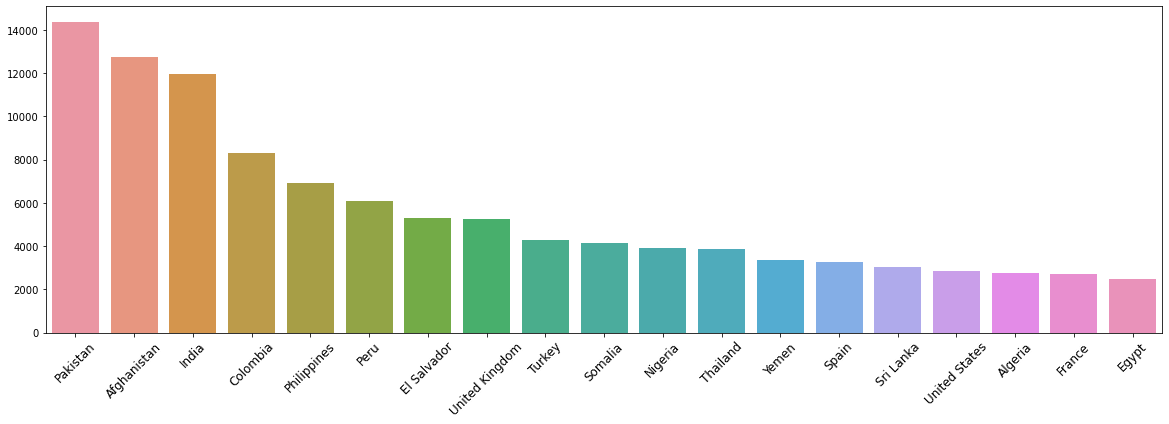

In [51]:
plt.subplots(figsize=(20,6))
sns.barplot(x=x,y=y)
plt.xticks(rotation=45,fontsize=12)

#### here you can see the top 3 countires affected by terrorists are Pakistan , Afganistan and india

## Let's look at what types of attacks causes the massacre 
#### visualising attemts by different attack type

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

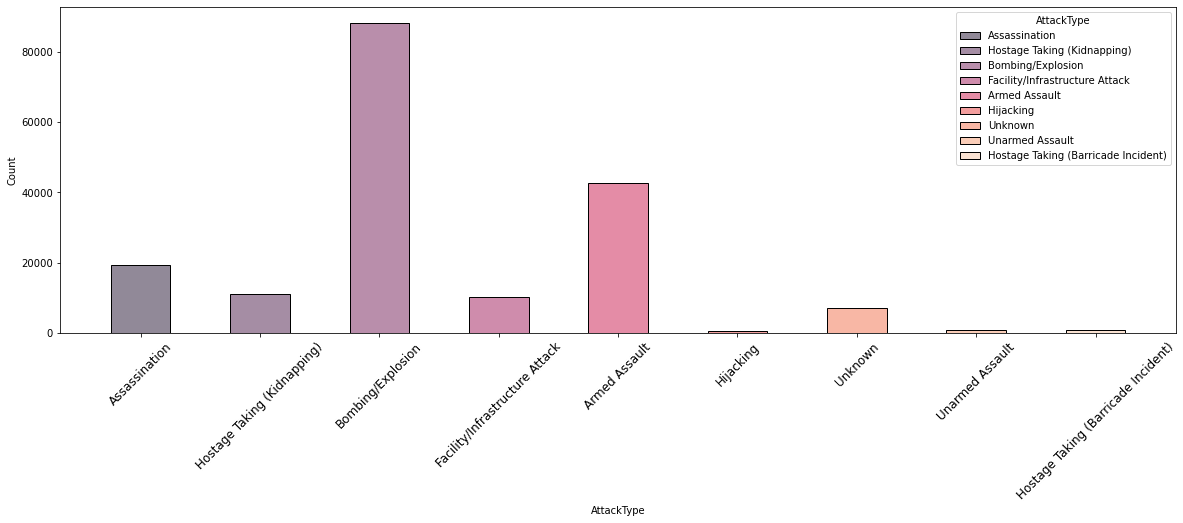

In [52]:
plt.subplots(figsize=(20,6))
sns.histplot(x="AttackType",data=terror,discrete=True,hue = "AttackType",common_norm= True,fill = True,palette = "rocket",shrink=0.5)
plt.xticks(rotation=45,fontsize=12)

## Visualisation using pie chart

In [53]:
import matplotlib.pyplot as plt

In [54]:

# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
# drop the NaN values
print('Number of people killed by terror attack:', int(sum(killData.dropna())))
# Let's look at what types of attacks these deaths were made of.
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

Number of people killed by terror attack: 411868


In [55]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')

In [56]:
# convert line to list
labels = typeKillFormatData.columns.tolist() 
 # transpoze
transpoze = typeKillFormatData.T
values = transpoze.values.tolist()

In [57]:
values = np.array(values)
values= values.reshape((1,- 1)) # <--- THIS IS IT
print(values) 

[[160297  24920 157321   3642   3718   4478  24231    880  32381]]


In [58]:
a= [160297. , 24920. ,157321. ,  3642. ,  3718.   ,4478. , 24231.  ,  880.  ,32381.]
colors=['gold','yellow','green','lightcoral','lightskyblue','tan','red','seagreen','c']
labels=['Armed Assault','Assassination','Bombing/Explosion','Facility/Infrastructure Attack','Hijacking','Hostage Taking (Barricade Incident)','Hostage Taking (Kidnapping)', 'Unarmed Assault','Unknown']

### url for pie chart for better visualisation
url="https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f"

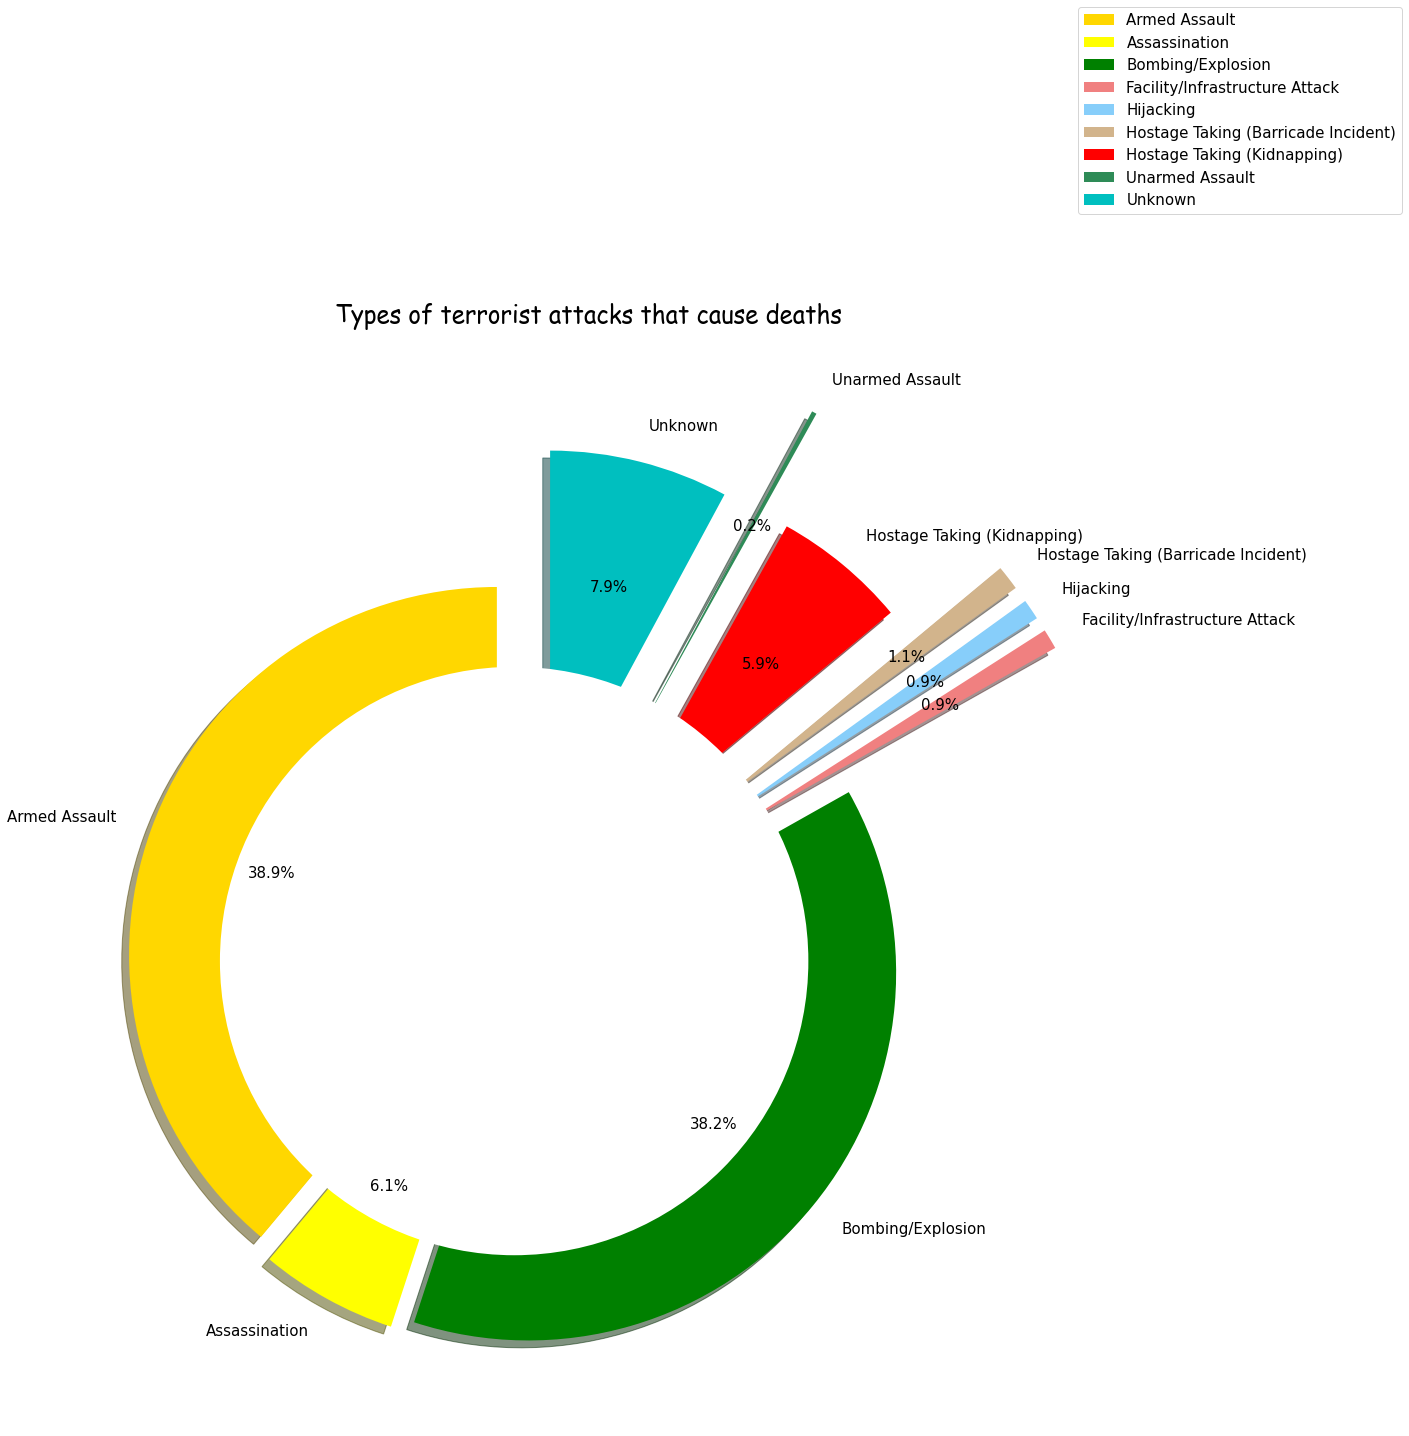

In [59]:
plt.subplots(figsize=(20,20))
#explsion
explode = (0.05,0.05,0.05,0.7,0.7,0.7,0.4,0.7,0.4)
plt.pie(a,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True,pctdistance=0.65,startangle=90,textprops={'fontsize': 15})
plt.axis('equal')
#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# location legend
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3,1.3), fontsize=15) 
plt.title('Types of terrorist attacks that cause deaths', fontname='Comic Sans MS', fontsize=24)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

#### Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This study shows how dangerous weapons and explosives are to the world.

In [60]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [61]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,258,1,44,1244,76,14,79,3,0,9,42,79,11,203,0,28,134,4205,543,2347,365,1990,1119,228,1008,14698,1,17,248,8,45,6,27,4069,5,274,3,34,2,9,54,3869,12053,2,46,3,1765,0,8,11,534,1,0,6,13,278,84,19,325,9,8,5167,213,17,41,336,307,4,6,0,19341,1238,1,1673,78589,117,1703,420,268,42,66,133,39,1948,83,63,10,27,2,4061,46,177,2598,1,0,1,49,31,33,152,20,1432,5,0,43,0,780,13,1,292,2711,1280,220,1969,37,35,0,1,10598,1474,22682,3,3,79,23822,38,79,59,15,12771,9559,9,32,7,182,217,4,4308,3236,672,325,3,3,0,840,5,7,1,4,10273,2674,10,2634,81,0,96,1288,15530,0,2,3883,29,6,22,74,15229,60,307,73,2742,76,6,351,6888,3,3065,2261,123,3410,3771,6,68,0,0,227,1,0,1500,97,1,8776,119,324,70,154


In [62]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

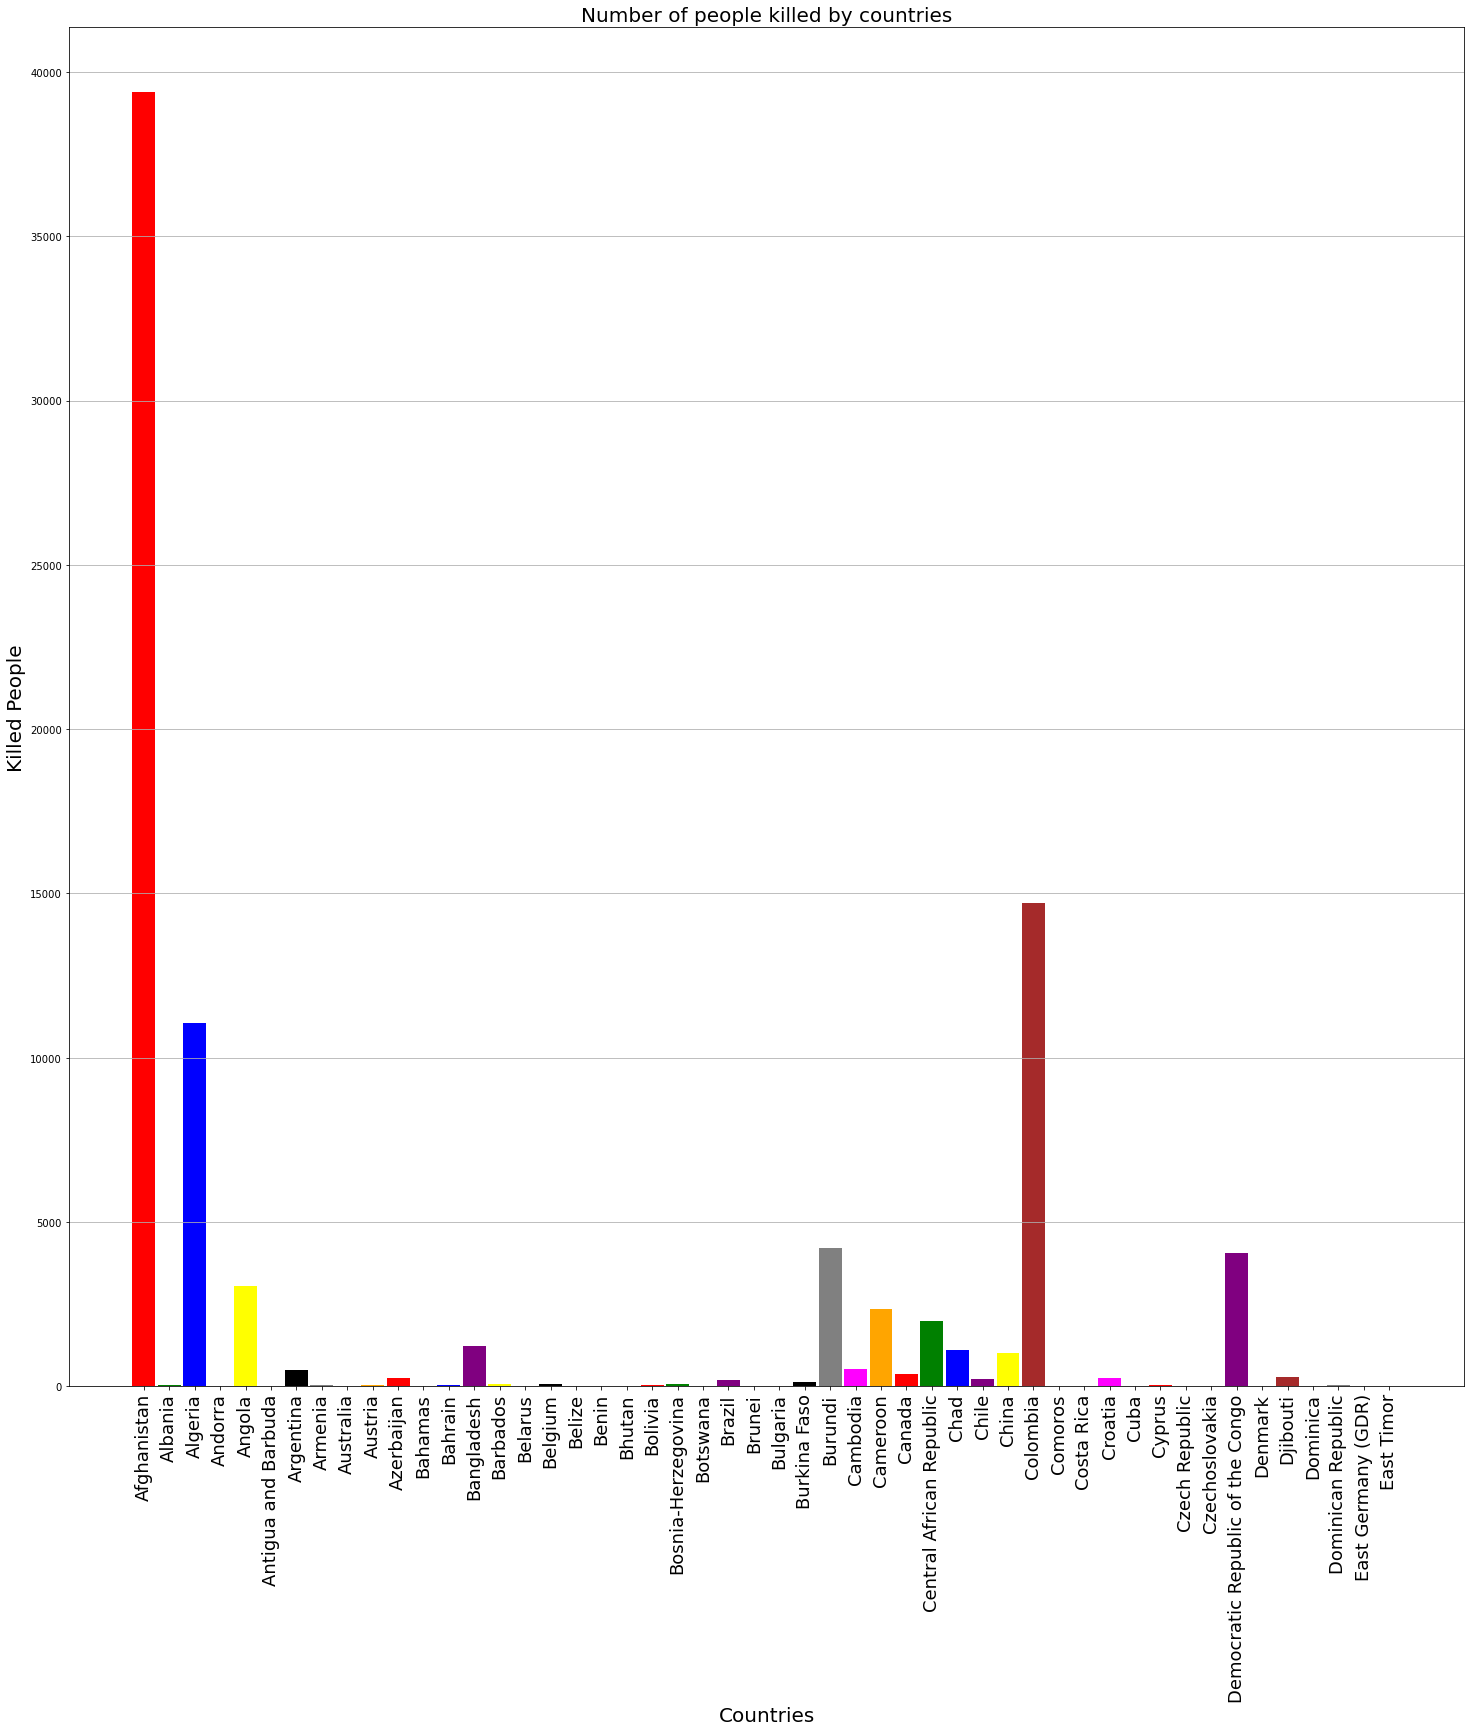

In [63]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

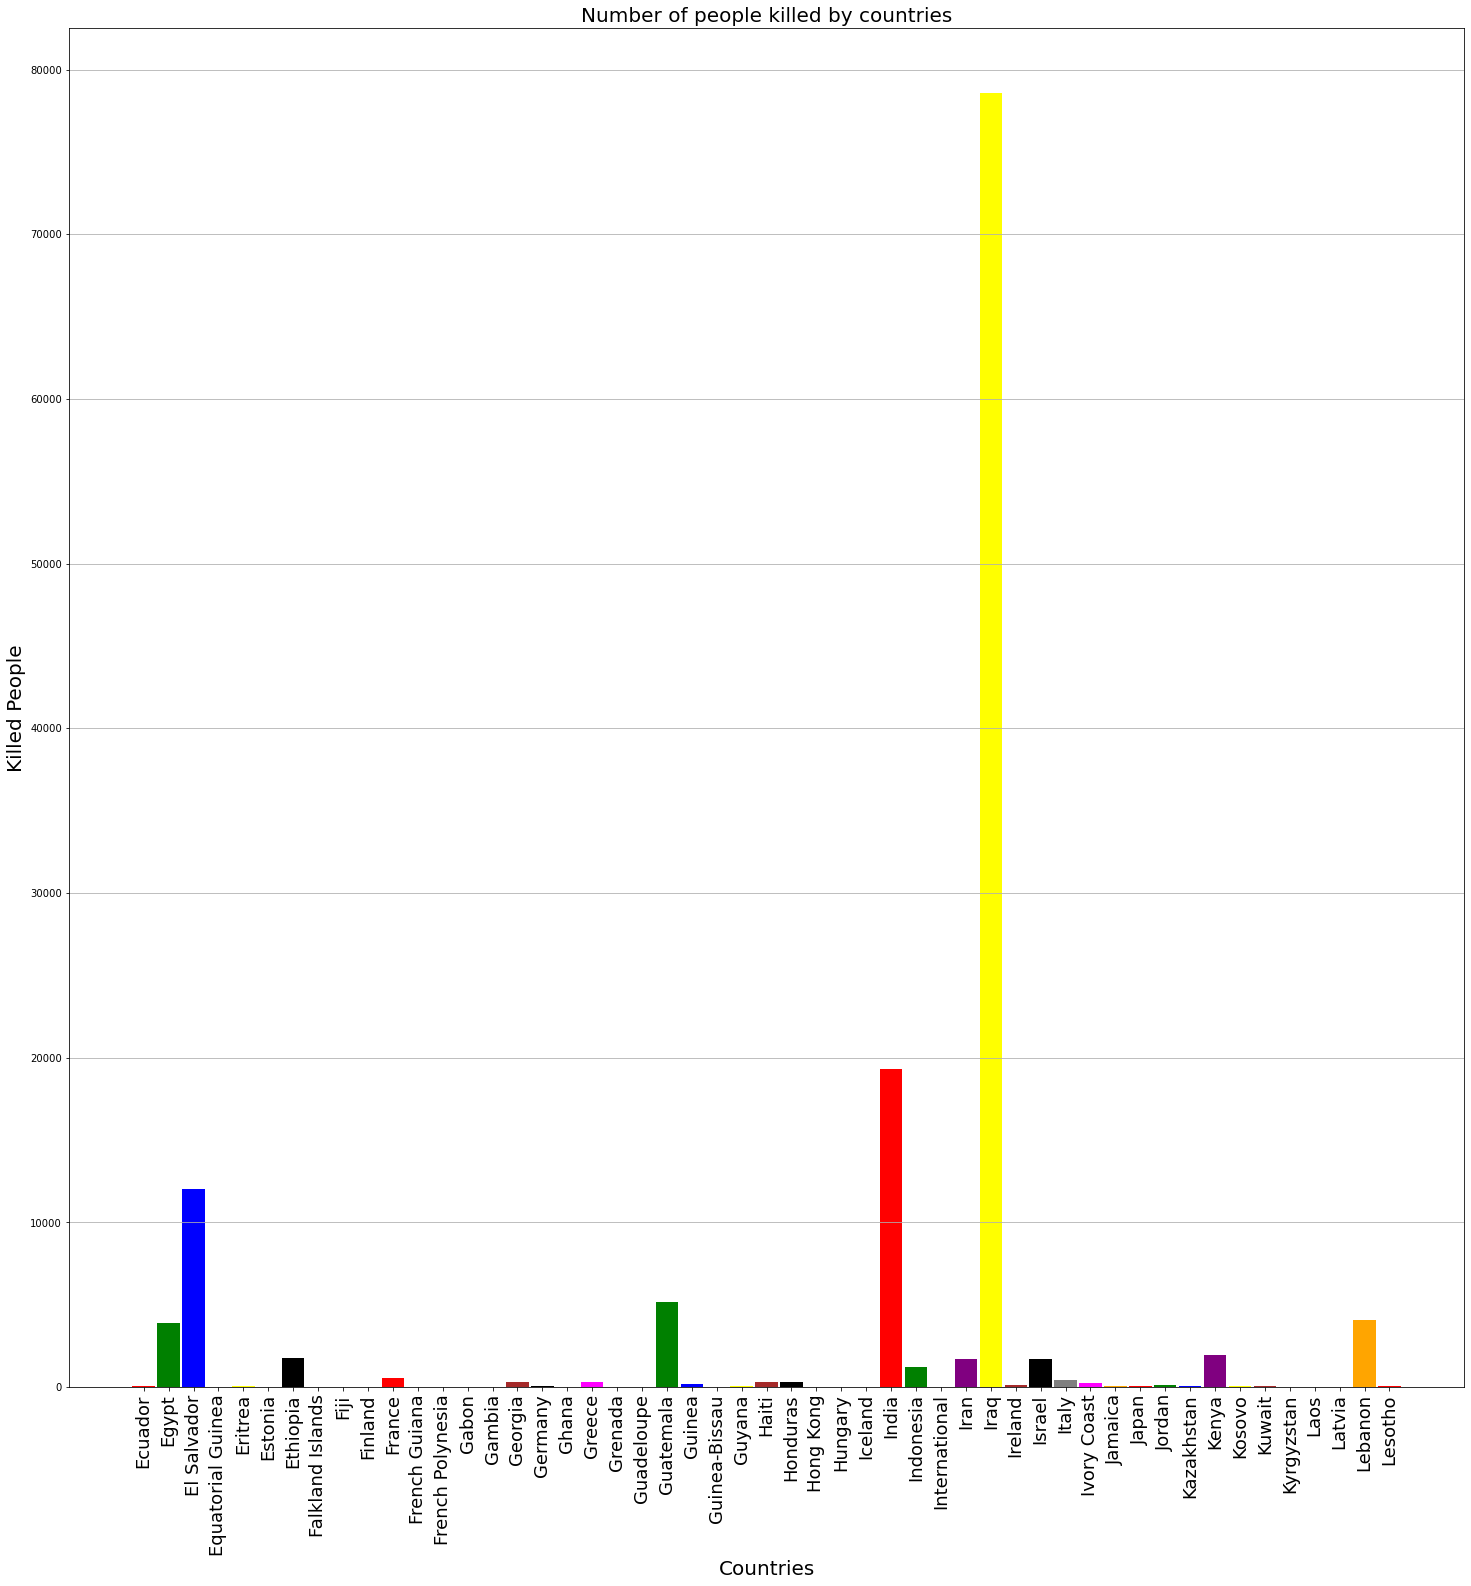

In [64]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()


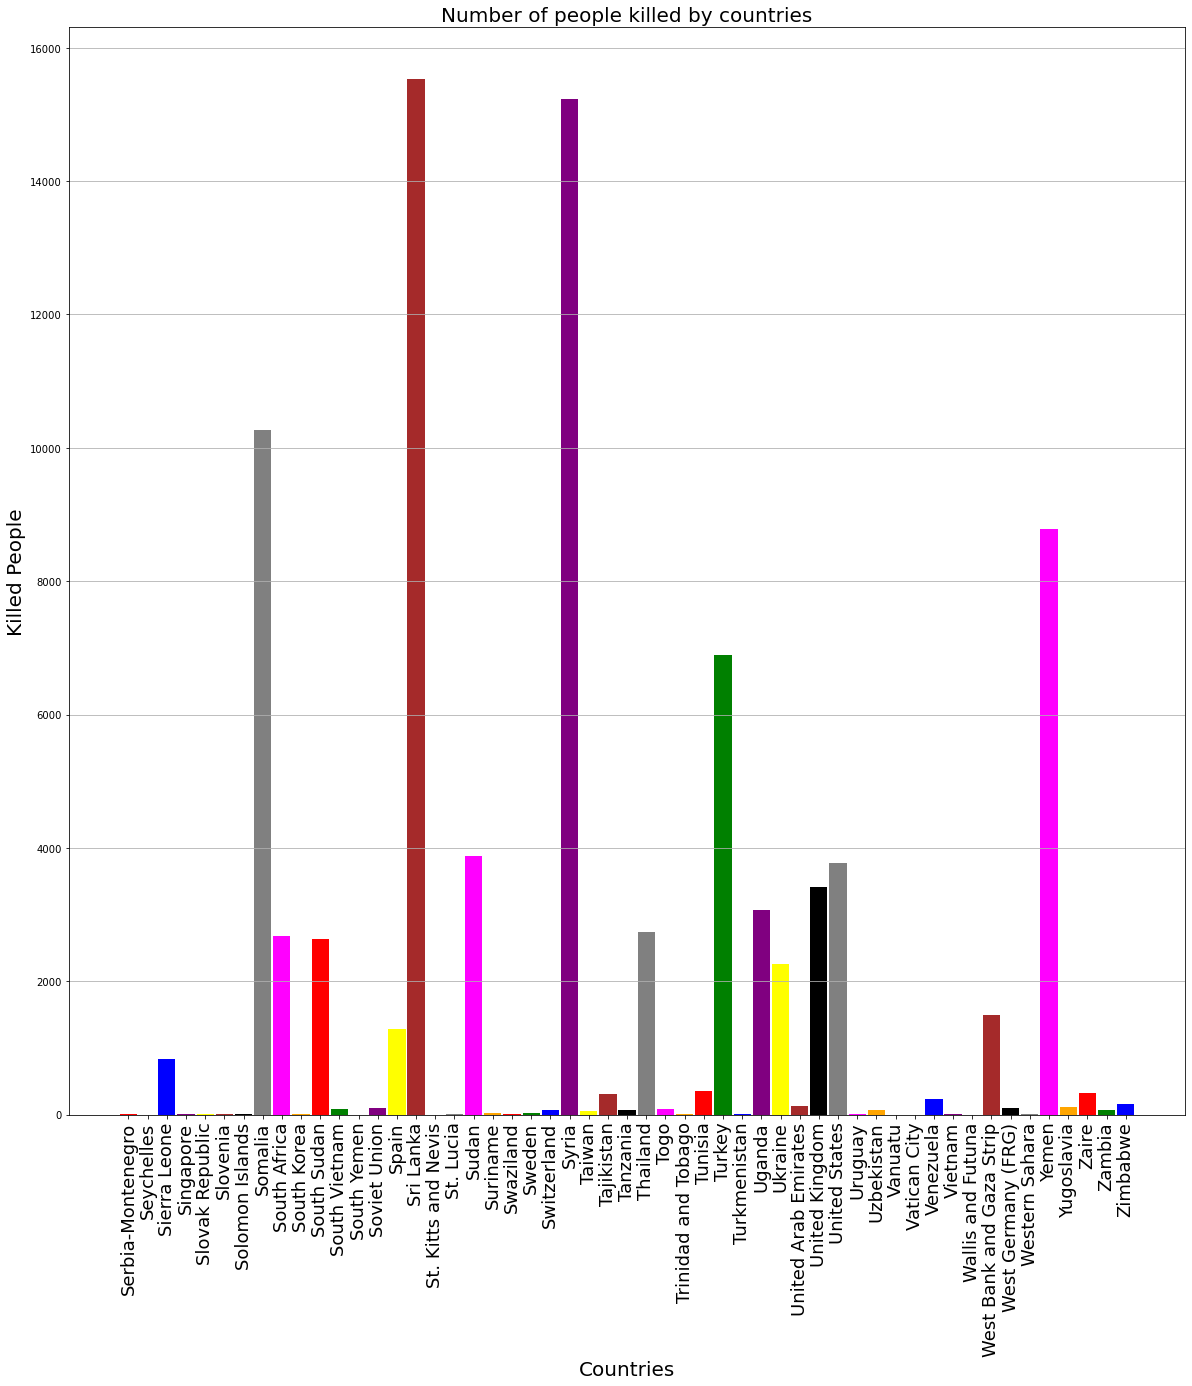

In [65]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

<b>Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.<b>